In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import IsolationForest
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.2f}'.format)
from sklearn.model_selection import train_test_split

In [140]:
colddata = pd.read_csv('../data/cold_final_dataset.csv')
colddata.head()

,Unnamed: 0,country,subregion,region,location,temperature,start_year,start_month,total_deaths,start_date,end_date,duration_days,duration,latitude,longitude,delta_temp_C,delta_temp_std
0,0,Afghanistan,Southern Asia,Asia,"Hirat, Faryab, Jawzjan, Balkh, Samangan, Sar-e...",-25.00,2001,1,150.00,2001-01-31,2001-02-20,20 days,20,30,70,-24.86,-8.56
1,1,Poland,Eastern Europe,Europe,"Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lub...",-25.00,2001,10,270.00,2001-10-10,2002-01-20,102 days,102,50,20,-15.94,-4.31
2,2,Poland,Eastern Europe,Europe,"Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lub...",-25.00,2001,10,270.00,2001-10-10,2002-01-20,102 days,102,50,20,-15.94,-4.31
3,3,Peru,Latin America and the Caribbean,Americas,"Ayacucho, Huancavelica, Tacna, Moquegua, Arequ...",-28.00,2003,7,339.00,2003-07-07,2003-08-15,39 days,39,-10,-70,-43.30,-20.44
4,4,South Africa,Sub-Saharan Africa,Africa,"Gauteng, Eastern Cape provinces",0.00,2007,5,22.00,2007-05-21,2007-05-27,6 days,6,-30,30,-1.69,-0.67


In [141]:
heatdata = pd.read_csv('../data/Hot_final_dataset.csv')
heatdata.head()

,Unnamed: 0,country,subregion,region,location,temperature,start_year,start_month,total_deaths,start_date,end_date,duration_days,duration,latitude,longitude,delta_temp_C,delta_temp_std
0,0,India,Southern Asia,Asia,"Madhya Pradesh, Andhra Pradesh, Uttar Pradesh,...",50.00,2002,5,1030.00,2002-05-10,2002-05-22,12 days,12,20.00,80.00,26.64,13.40
1,1,Bangladesh,Southern Asia,Asia,"Dhaka, Khulna, Rajshahi provinces",40.00,2003,5,62.00,2003-05-10,2003-06-12,33 days,33,30.00,90.00,55.98,16.90
2,2,India,Southern Asia,Asia,"Andhra Pradesh, Orissa, Tamil Nadu, Vidarbha (...",49.00,2003,5,1210.00,2003-05-14,2003-06-06,23 days,23,20.00,80.00,26.18,12.74
3,3,Pakistan,Southern Asia,Asia,Punjab province,50.00,2003,5,200.00,2003-05-01,2003-06-06,36 days,36,30.00,70.00,36.55,13.31
4,4,Czechia,Eastern Europe,Europe,"Jihocesky, Jihomoravsky, Praha, Severocesky, S...",25.00,2003,7,418.00,2003-07-19,2003-07-22,3 days,3,50.00,20.00,15.66,6.78


In [142]:
colddata['event_type'] = 'cold'
heatdata['event_type'] = 'heat'
data = pd.concat([colddata, heatdata], ignore_index=True)
data = data.drop(columns=['Unnamed: 0'])
data.head()

,country,subregion,region,location,temperature,start_year,start_month,total_deaths,start_date,end_date,duration_days,duration,latitude,longitude,delta_temp_C,delta_temp_std,event_type
0,Afghanistan,Southern Asia,Asia,"Hirat, Faryab, Jawzjan, Balkh, Samangan, Sar-e...",-25.00,2001,1,150.00,2001-01-31,2001-02-20,20 days,20,30.00,70.00,-24.86,-8.56,cold
1,Poland,Eastern Europe,Europe,"Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lub...",-25.00,2001,10,270.00,2001-10-10,2002-01-20,102 days,102,50.00,20.00,-15.94,-4.31,cold
2,Poland,Eastern Europe,Europe,"Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lub...",-25.00,2001,10,270.00,2001-10-10,2002-01-20,102 days,102,50.00,20.00,-15.94,-4.31,cold
3,Peru,Latin America and the Caribbean,Americas,"Ayacucho, Huancavelica, Tacna, Moquegua, Arequ...",-28.00,2003,7,339.00,2003-07-07,2003-08-15,39 days,39,-10.00,-70.00,-43.30,-20.44,cold
4,South Africa,Sub-Saharan Africa,Africa,"Gauteng, Eastern Cape provinces",0.00,2007,5,22.00,2007-05-21,2007-05-27,6 days,6,-30.00,30.00,-1.69,-0.67,cold


In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         105 non-null    object 
 1   subregion       105 non-null    object 
 2   region          105 non-null    object 
 3   location        78 non-null     object 
 4   temperature     105 non-null    float64
 5   start_year      105 non-null    int64  
 6   start_month     105 non-null    int64  
 7   total_deaths    105 non-null    float64
 8   start_date      105 non-null    object 
 9   end_date        105 non-null    object 
 10  duration_days   105 non-null    object 
 11  duration        105 non-null    int64  
 12  latitude        102 non-null    float64
 13  longitude       102 non-null    float64
 14  delta_temp_C    105 non-null    float64
 15  delta_temp_std  105 non-null    float64
 16  event_type      105 non-null    object 
dtypes: float64(6), int64(3), object(8)


In [144]:
data.isnull().sum()

country            0
subregion          0
region             0
location          27
temperature        0
start_year         0
start_month        0
total_deaths       0
start_date         0
end_date           0
duration_days      0
duration           0
latitude           3
longitude          3
delta_temp_C       0
delta_temp_std     0
event_type         0
dtype: int64

In [145]:
data['duration_days'] = data['duration_days'].str.extract('(\d+)').astype(int)
data.head()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/var/folders/z0/4lpm_z051kx3_j41lk3xxj280000gn/T/ipykernel_1233/442246062.py:1: SyntaxWarning: invalid escape sequence '\d'
  data['duration_days'] = data['duration_days'].str.extract('(\d+)').astype(int)


,country,subregion,region,location,temperature,start_year,start_month,total_deaths,start_date,end_date,duration_days,duration,latitude,longitude,delta_temp_C,delta_temp_std,event_type
0,Afghanistan,Southern Asia,Asia,"Hirat, Faryab, Jawzjan, Balkh, Samangan, Sar-e...",-25.00,2001,1,150.00,2001-01-31,2001-02-20,20,20,30.00,70.00,-24.86,-8.56,cold
1,Poland,Eastern Europe,Europe,"Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lub...",-25.00,2001,10,270.00,2001-10-10,2002-01-20,102,102,50.00,20.00,-15.94,-4.31,cold
2,Poland,Eastern Europe,Europe,"Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lub...",-25.00,2001,10,270.00,2001-10-10,2002-01-20,102,102,50.00,20.00,-15.94,-4.31,cold
3,Peru,Latin America and the Caribbean,Americas,"Ayacucho, Huancavelica, Tacna, Moquegua, Arequ...",-28.00,2003,7,339.00,2003-07-07,2003-08-15,39,39,-10.00,-70.00,-43.30,-20.44,cold
4,South Africa,Sub-Saharan Africa,Africa,"Gauteng, Eastern Cape provinces",0.00,2007,5,22.00,2007-05-21,2007-05-27,6,6,-30.00,30.00,-1.69,-0.67,cold


In [146]:
data.shape

(105, 17)

In [147]:
df = data.copy()
df['region_temp_mean'] = df.groupby('region')['temperature'].transform('mean')
df['temperature_anomaly'] = df['temperature'] - df['region_temp_mean']
df = pd.get_dummies(df, columns=['country', 'subregion', 'region', 'event_type'], dtype=int)
df['duration_days'] = df['duration_days'].astype(int)
df.head()

,location,temperature,start_year,start_month,total_deaths,start_date,end_date,duration_days,duration,latitude,longitude,delta_temp_C,delta_temp_std,region_temp_mean,temperature_anomaly,country_Afghanistan,country_Algeria,country_Australia,country_Austria,country_Bangladesh,country_Belgium,country_Bosnia and Herzegovina,country_Bulgaria,country_Canada,country_Canary Islands,country_China,country_Croatia,country_Czechia,country_Denmark,country_Finland,country_France,country_Germany,country_Greece,country_Hungary,country_India,country_Ireland,country_Italy,country_Japan,country_Mexico,country_Netherlands (Kingdom of the),country_Norway,country_Pakistan,country_Peru,country_Poland,country_Portugal,country_Republic of Korea,country_Romania,country_Russian Federation,country_Slovakia,country_South Africa,country_Spain,country_State of Palestine,country_Sudan,country_Switzerland,country_Taiwan (Province of China),country_Thailand,country_United Kingdom of Great Britain and Northern Ireland,subregion_Australia and New Zealand,subregion_Eastern Asia,subregion_Eastern Europe,subregion_Latin America and the Caribbean,subregion_Northern Africa,subregion_Northern America,subregion_Northern Europe,subregion_South-eastern Asia,subregion_Southern Asia,subregion_Southern Europe,subregion_Sub-Saharan Africa,subregion_Western Asia,subregion_Western Europe,region_Africa,region_Americas,region_Asia,region_Europe,region_Oceania,event_type_cold,event_type_heat
0,"Hirat, Faryab, Jawzjan, Balkh, Samangan, Sar-e...",-25.00,2001,1,150.00,2001-01-31,2001-02-20,20,20,30.00,70.00,-24.86,-8.56,18.01,-43.01,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
1,"Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lub...",-25.00,2001,10,270.00,2001-10-10,2002-01-20,102,102,50.00,20.00,-15.94,-4.31,16.49,-41.49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,"Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lub...",-25.00,2001,10,270.00,2001-10-10,2002-01-20,102,102,50.00,20.00,-15.94,-4.31,16.49,-41.49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,"Ayacucho, Huancavelica, Tacna, Moquegua, Arequ...",-28.00,2003,7,339.00,2003-07-07,2003-08-15,39,39,-10.00,-70.00,-43.30,-20.44,-1.93,-26.07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,"Gauteng, Eastern Cape provinces",0.00,2007,5,22.00,2007-05-21,2007-05-27,6,6,-30.00,30.00,-1.69,-0.67,36.20,-36.20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0


In [148]:
df.shape

(105, 77)

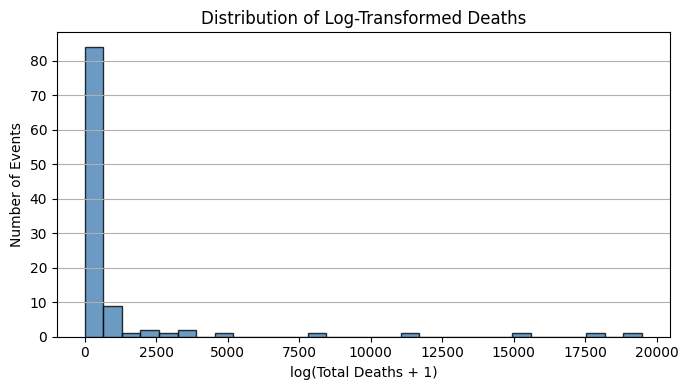

In [149]:
deaths = df['total_deaths']
plt.figure(figsize=(7,4))
plt.hist(deaths, bins=30, color='steelblue', edgecolor='black', alpha=0.8)
plt.xlabel("log(Total Deaths + 1)")
plt.ylabel("Number of Events")
plt.title("Distribution of Log-Transformed Deaths")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

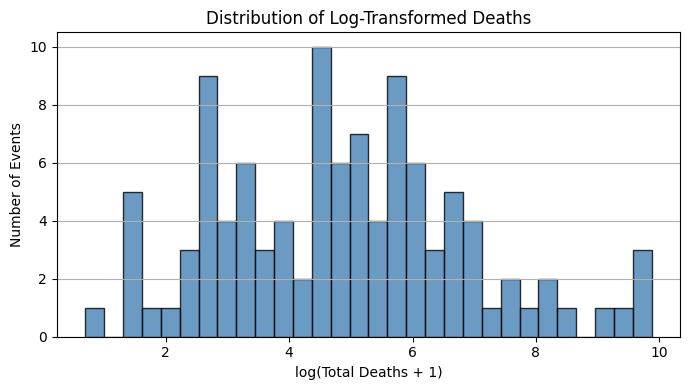

In [150]:
deaths = df['total_deaths']
log_deaths = np.log1p(deaths)
plt.figure(figsize=(7,4))
plt.hist(log_deaths, bins=30, color='steelblue', edgecolor='black', alpha=0.8)
plt.xlabel("log(Total Deaths + 1)")
plt.ylabel("Number of Events")
plt.title("Distribution of Log-Transformed Deaths")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [151]:
region_cols = [col for col in df.columns if col.startswith('region_')]

# Create temperature-region and duration-region interaction features
for reg in region_cols:
    df[f'temperature_{reg}'] = df['temperature'] * df[reg]
    df[f'duration_days_{reg}'] = df['duration_days'] * df[reg]
    df[f'delta_temp_C_{reg}'] = df['delta_temp_C'] * df[reg]  # Optional

len(region_cols)

6

In [152]:
# Choose base features
base_features = [
    'temperature', 'duration_days', 'latitude', 'longitude', 'delta_temp_C', 'delta_temp_std'
]
# Add one-hot region features and new interaction features
interaction_features = [col for col in df.columns if (
    col.startswith('region_') or
    col.startswith('temperature_region_') or
    col.startswith('duration_days_region_') or
    col.startswith('delta_temp_C_region_') or
    col == 'temperature_anomaly'
)]
features = base_features + interaction_features

In [153]:
extreme = df[
    ((df['event_type_cold'] == 1) & (df['delta_temp_std'] <= -2.5) & (df['duration_days'] >= 5)) |
    ((df['event_type_heat'] == 1) & (df['delta_temp_std'] >= 2.5) & (df['duration_days'] >= 5))
].copy()
extreme.shape

(83, 95)

In [154]:
extreme.head()

,location,temperature,start_year,start_month,total_deaths,start_date,end_date,duration_days,duration,latitude,longitude,delta_temp_C,delta_temp_std,region_temp_mean,temperature_anomaly,country_Afghanistan,country_Algeria,country_Australia,country_Austria,country_Bangladesh,country_Belgium,country_Bosnia and Herzegovina,country_Bulgaria,country_Canada,country_Canary Islands,country_China,country_Croatia,country_Czechia,country_Denmark,country_Finland,country_France,country_Germany,country_Greece,country_Hungary,country_India,country_Ireland,country_Italy,country_Japan,country_Mexico,country_Netherlands (Kingdom of the),country_Norway,country_Pakistan,country_Peru,country_Poland,country_Portugal,country_Republic of Korea,country_Romania,country_Russian Federation,country_Slovakia,country_South Africa,country_Spain,country_State of Palestine,country_Sudan,country_Switzerland,country_Taiwan (Province of China),country_Thailand,country_United Kingdom of Great Britain and Northern Ireland,subregion_Australia and New Zealand,subregion_Eastern Asia,subregion_Eastern Europe,subregion_Latin America and the Caribbean,subregion_Northern Africa,subregion_Northern America,subregion_Northern Europe,subregion_South-eastern Asia,subregion_Southern Asia,subregion_Southern Europe,subregion_Sub-Saharan Africa,subregion_Western Asia,subregion_Western Europe,region_Africa,region_Americas,region_Asia,region_Europe,region_Oceania,event_type_cold,event_type_heat,temperature_region_temp_mean,duration_days_region_temp_mean,delta_temp_C_region_temp_mean,temperature_region_Africa,duration_days_region_Africa,delta_temp_C_region_Africa,temperature_region_Americas,duration_days_region_Americas,delta_temp_C_region_Americas,temperature_region_Asia,duration_days_region_Asia,delta_temp_C_region_Asia,temperature_region_Europe,duration_days_region_Europe,delta_temp_C_region_Europe,temperature_region_Oceania,duration_days_region_Oceania,delta_temp_C_region_Oceania
0,"Hirat, Faryab, Jawzjan, Balkh, Samangan, Sar-e...",-25.00,2001,1,150.00,2001-01-31,2001-02-20,20,20,30.00,70.00,-24.86,-8.56,18.01,-43.01,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,-450.13,360.11,-447.55,-0.00,0,-0.00,-0.00,0,-0.00,-25.00,20,-24.86,-0.00,0,-0.00,-0.00,0,-0.00
1,"Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lub...",-25.00,2001,10,270.00,2001-10-10,2002-01-20,102,102,50.00,20.00,-15.94,-4.31,16.49,-41.49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,-412.34,1682.33,-262.93,-0.00,0,-0.00,-0.00,0,-0.00,-0.00,0,-0.00,-25.00,102,-15.94,-0.00,0,-0.00
2,"Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lub...",-25.00,2001,10,270.00,2001-10-10,2002-01-20,102,102,50.00,20.00,-15.94,-4.31,16.49,-41.49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,-412.34,1682.33,-262.93,-0.00,0,-0.00,-0.00,0,-0.00,-0.00,0,-0.00,-25.00,102,-15.94,-0.00,0,-0.00
3,"Ayacucho, Huancavelica, Tacna, Moquegua, Arequ...",-28.00,2003,7,339.00,2003-07-07,2003-08-15,39,39,-10.00,-70.00,-43.30,-20.44,-1.93,-26.07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,54.13,-75.40,83.72,-0.00,0,-0.00,-28.00,39,-43.30,-0.00,0,-0.00,-0.00,0,-0.00,-0.00,0,-0.00
5,"Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lub...",-25.00,2008,11,82.00,2008-11-01,2009-01-08,68,68,50.00,20.00,-14.38,-3.69,16.49,-41.49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,-412.34,1121.55,-237.22,-0.00,0,-0.00,-0.00,0,-0.00,-0.00,0,-0.00,-25.00,68,-14.38,-0.00,0,-0.00


In [155]:
X = extreme.drop(columns=['total_deaths','location'])

# Target variable
y = np.log1p(extreme['total_deaths']) 

print(X.shape)
print(y.shape)

(83, 93)
(83,)


In [156]:

y.head()

0   5.02
1   5.60
2   5.60
3   5.83
5   4.42
Name: total_deaths, dtype: float64

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2025, test_size=0.2)

In [158]:
X_train.shape

(66, 93)

In [159]:
X_test.shape

(17, 93)

In [160]:
X_train.info()
X_train['start_date'] = pd.to_datetime(X_train['start_date'])
X_train['end_date'] = pd.to_datetime(X_train['end_date'])
X_test['start_date'] = pd.to_datetime(X_test['start_date'])
X_test['end_date'] = pd.to_datetime(X_test['end_date'])

# Create days since epoch (integer)
X_train['start_date_int'] = (X_train['start_date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')
X_train['end_date_int'] = (X_train['end_date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')
X_test['start_date_int'] = (X_test['start_date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')
X_test['end_date_int'] = (X_test['end_date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')

# Drop original object columns
X_train = X_train.drop(columns=['start_date', 'end_date'])
X_test = X_test.drop(columns=['start_date', 'end_date'])

print("X_train = ",X_train.shape)
print("X_test:",X_test.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 66 entries, 93 to 84
Data columns (total 93 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   temperature                                                   66 non-null     float64
 1   start_year                                                    66 non-null     int64  
 2   start_month                                                   66 non-null     int64  
 3   start_date                                                    66 non-null     object 
 4   end_date                                                      66 non-null     object 
 5   duration_days                                                 66 non-null     int64  
 6   duration                                                      66 non-null     int64  
 7   latitude                                                      63 non-null    

In [161]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66 entries, 93 to 84
Data columns (total 93 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   temperature                                                   66 non-null     float64
 1   start_year                                                    66 non-null     int64  
 2   start_month                                                   66 non-null     int64  
 3   duration_days                                                 66 non-null     int64  
 4   duration                                                      66 non-null     int64  
 5   latitude                                                      63 non-null     float64
 6   longitude                                                     63 non-null     float64
 7   delta_temp_C                                                  66 non-null    

In [162]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 83 to 55
Data columns (total 93 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   temperature                                                   17 non-null     float64
 1   start_year                                                    17 non-null     int64  
 2   start_month                                                   17 non-null     int64  
 3   duration_days                                                 17 non-null     int64  
 4   duration                                                      17 non-null     int64  
 5   latitude                                                      17 non-null     float64
 6   longitude                                                     17 non-null     float64
 7   delta_temp_C                                                  17 non-null    

In [163]:
# pipeline
pipe = Pipeline([
    ('impute', SimpleImputer(strategy='mean')),
    ('select', SelectKBest(score_func=f_regression)),
    ('rf', RandomForestRegressor(random_state=42)),
    
])

# Parameter grid for KBest
param_grid = {
    'select__k': [10, 30,34,35,36,40,50, X_train.shape[1]],  # try several K
    'rf__n_estimators': [100, 200] ,
     'rf__max_depth': [None, 5, 10],
    'rf__min_samples_split': [2, 5, 10] # Optional: also tune RF if desired
}

# Grid search 
grid = GridSearchCV(pipe, param_grid, scoring='r2', cv=3, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best k:", grid.best_params_['select__k'])
print("Best score:", grid.best_score_)

Best k: 34
Best score: 0.19194050173699864


In [164]:
# Fill NaNs in both train and test (use median or mean)
X_train_imputed = X_train.fillna(X_train.median())
X_test_imputed = X_test.fillna(X_train.median())  # Use training median for both!


selector = SelectKBest(score_func=f_regression, k=35)
X_train = selector.fit_transform(X_train_imputed, y_train)
X_test= selector.transform(X_test_imputed)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
print("Train R²:", rf.score(X_train, y_train))
print("Test R²:", rf.score(X_test, y_test))
print("X_train.shape:",X_train.shape)

Train R²: 0.8757084267621128
Test R²: 0.4898782992219176
X_train.shape: (66, 35)


In [165]:
#indices of selected features
selected_indices = selector.get_support(indices=True)
selected_feature_names = X_train_imputed.columns[selected_indices]

# feature importances
importances = rf.feature_importances_

#DataFrame
feature_importances = pd.DataFrame({
    'feature': selected_feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)
print(feature_importances)

                                              feature  importance
30                          temperature_region_Europe        0.15
6                                 temperature_anomaly        0.13
4                                        delta_temp_C        0.13
5                                      delta_temp_std        0.13
26                      delta_temp_C_region_temp_mean        0.06
25                     duration_days_region_temp_mean        0.05
32                         delta_temp_C_region_Europe        0.05
3                                            duration        0.05
2                                       duration_days        0.04
31                        duration_days_region_Europe        0.04
0                                         temperature        0.02
33                                     start_date_int        0.02
7                                    country_Bulgaria        0.02
34                                       end_date_int        0.02
24        

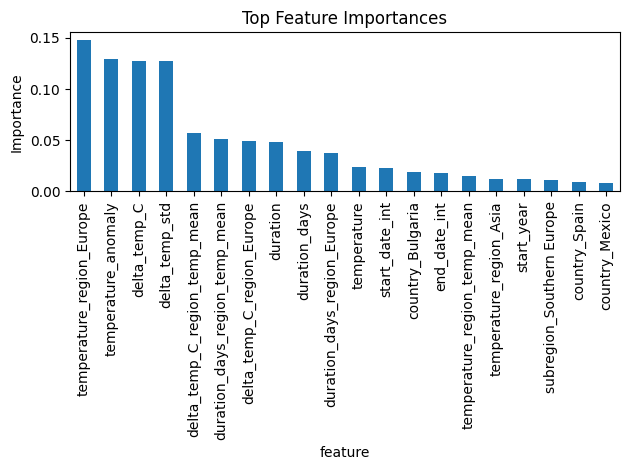

In [166]:
feature_importances.head(20).plot.bar(x='feature', y='importance', legend=False)
#plt.figure(figsize=(50,20))
#plt.bar(feature_importances['feature'],feature_importances['importance'])
plt.title("Top Feature Importances")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [ ]:

iso = IsolationForest(contamination=0.5, random_state=42)
iso.fit(X_train)  # Fitting train set

# Predict anomaly (-1 = anomaly, 1 = normal)
anomaly_train = iso.predict(X_train)
anomaly_test = iso.predict(X_test)
X_train_anomaly = pd.DataFrame(X_train, columns=selected_feature_names)
X_train_anomaly['anomaly_flag'] = anomaly_train

X_test_anomaly = pd.DataFrame(X_test, columns=selected_feature_names)
X_test_anomaly['anomaly_flag'] = anomaly_test

X_train_anomaly.head()


,temperature,start_year,duration_days,duration,delta_temp_C,delta_temp_std,temperature_anomaly,country_Bulgaria,country_China,country_France,country_Greece,country_Mexico,country_Romania,country_Slovakia,country_South Africa,country_Spain,country_United Kingdom of Great Britain and Northern Ireland,subregion_Eastern Europe,subregion_Southern Europe,subregion_Sub-Saharan Africa,subregion_Western Europe,region_Africa,event_type_cold,event_type_heat,temperature_region_temp_mean,duration_days_region_temp_mean,delta_temp_C_region_temp_mean,temperature_region_Africa,delta_temp_C_region_Africa,temperature_region_Asia,temperature_region_Europe,duration_days_region_Europe,delta_temp_C_region_Europe,start_date_int,end_date_int,anomaly_flag
0,42.00,2022.00,97.00,97.00,25.77,12.15,25.51,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,692.72,1599.86,424.99,0.00,0.00,0.00,42.00,97.00,25.77,19142.00,19239.00,-1
1,-20.20,2011.00,17.00,17.00,-30.73,-12.10,-38.21,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,-363.71,306.09,-553.39,-0.00,-0.00,-20.20,-0.00,0.00,-0.00,14975.00,14992.00,1
2,-31.00,2009.00,14.00,14.00,-17.36,-3.92,-47.49,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,-511.30,230.91,-286.33,-0.00,-0.00,-0.00,-31.00,14.00,-17.36,14245.00,14259.00,-1
3,-41.00,2016.00,6.00,6.00,-34.38,-13.52,-59.01,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,-738.22,108.03,-619.04,-0.00,-0.00,-41.00,-0.00,0.00,-0.00,16820.00,16826.00,-1
4,50.00,2005.00,15.00,15.00,26.73,11.40,31.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,900.26,270.08,481.21,0.00,0.00,50.00,0.00,0.00,0.00,12947.00,12962.00,1


In [168]:
X_test_anomaly.head()

,temperature,start_year,duration_days,duration,delta_temp_C,delta_temp_std,temperature_anomaly,country_Bulgaria,country_China,country_France,country_Greece,country_Mexico,country_Romania,country_Slovakia,country_South Africa,country_Spain,country_United Kingdom of Great Britain and Northern Ireland,subregion_Eastern Europe,subregion_Southern Europe,subregion_Sub-Saharan Africa,subregion_Western Europe,region_Africa,event_type_cold,event_type_heat,temperature_region_temp_mean,duration_days_region_temp_mean,delta_temp_C_region_temp_mean,temperature_region_Africa,delta_temp_C_region_Africa,temperature_region_Asia,temperature_region_Europe,duration_days_region_Europe,delta_temp_C_region_Europe,start_date_int,end_date_int,anomaly_flag
0,38.70,2019.00,38.00,38.00,27.87,13.16,22.21,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,638.30,626.75,459.62,0.00,0.00,0.00,38.70,38.00,27.87,18098.00,18136.00,-1
1,-18.00,2016.00,6.00,6.00,-11.22,-3.31,-36.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,-324.10,108.03,-202.06,-0.00,-0.00,-18.00,-0.00,0.00,-0.00,16820.00,16826.00,1
2,40.00,2022.00,97.00,97.00,32.77,12.79,23.51,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,659.74,1599.86,540.44,0.00,0.00,0.00,40.00,97.00,32.77,19142.00,19239.00,1
3,46.00,2019.00,13.00,13.00,30.40,12.22,29.51,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,758.70,214.41,501.42,0.00,0.00,0.00,46.00,13.00,30.40,18071.00,18084.00,-1
4,-25.00,2001.00,102.00,102.00,-15.94,-4.31,-41.49,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,-412.34,1682.33,-262.93,-0.00,-0.00,-0.00,-25.00,102.00,-15.94,11605.00,11707.00,-1


In [169]:
print("Number of anomalies in train:", (anomaly_train==-1).sum())

Number of anomalies in train: 33


In [170]:
print("Number of anomalies in test:", (anomaly_test==-1).sum())

Number of anomalies in test: 6


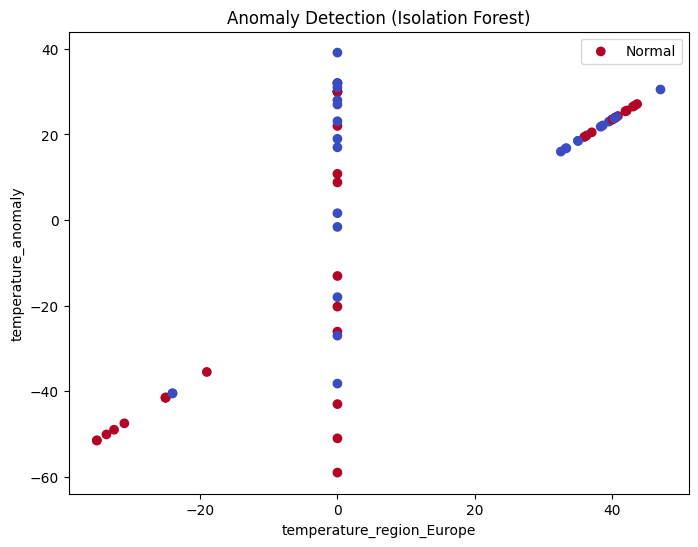

In [171]:
#the two most important features
feat1 = feature_importances.iloc[0]['feature']
feat2 = feature_importances.iloc[1]['feature']
plt.figure(figsize=(8, 6))
plt.scatter(X_train_anomaly[feat1], X_train_anomaly[feat2], 
            c=(X_train_anomaly['anomaly_flag'] == -1),  # True for anomalies
            cmap='coolwarm', label='Normal')
plt.xlabel(feat1)
plt.ylabel(feat2)
plt.title('Anomaly Detection (Isolation Forest)')
plt.legend(['Normal', 'Anomaly'])
plt.show()

In [ ]:
extreme['start_date'] = pd.to_datetime(extreme['start_date'])
extreme['end_date'] = pd.to_datetime(extreme['end_date'])
extreme['start_date_int'] = (extreme['start_date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')
extreme['end_date_int'] = (extreme['end_date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')


# Since country was dropped
onehot_countries = [c for c in df.columns if c.startswith('country_')]
def extract_country(row):
    for col in onehot_countries:
        if row.get(col, 0) == 1:
            return col.replace('country_', '')
    return None

extreme['country'] = extreme.apply(extract_country, axis=1)

# features for prediction use features present in both extreme and X_train_imputed
matching_features = [col for col in X_train_imputed.columns if col in extreme.columns]
extreme_imputed = extreme[matching_features].fillna(X_train_imputed.median())
extreme_selected = selector.transform(extreme_imputed)

#Predict deaths with trained RF model
extreme['rf_pred_deaths'] = np.expm1(rf.predict(extreme_selected))  # undo log1p

#underreported events
extreme['underreport_flag'] = (extreme['total_deaths'] < 0.5 * extreme['rf_pred_deaths']).astype(int)

#Isolation Forest to flag anomalies
extreme['anomaly'] = (iso.predict(extreme_selected) == -1).astype(int)

#Group and summarize
summary = (
    extreme.groupby('country').agg(
        total_events=('total_deaths', 'count'),
        underreported_events=('underreport_flag', 'sum'),
        anomalies=('anomaly', 'sum'),
        predicted_deaths_sum=('rf_pred_deaths', 'sum'),
        reported_deaths_sum=('total_deaths', 'sum'),
    )
    .reset_index()
)
summary['underreport_rate'] = summary['underreported_events'] / summary['total_events']
summary = summary.sort_values('underreport_rate', ascending=False)
summary


,country,total_events,underreported_events,anomalies,predicted_deaths_sum,reported_deaths_sum,underreport_rate
21,Mexico,1,1,1,8.19,3.00,1.00
18,Ireland,1,1,0,63.17,26.00,1.00
31,South Africa,1,1,1,32.09,11.00,1.00
30,Slovakia,1,1,1,8.42,1.00,1.00
6,Bosnia and Herzegovina,1,1,1,18.33,4.00,1.00
7,Bulgaria,1,1,1,10.90,3.00,1.00
23,Norway,1,1,0,105.03,30.00,1.00
9,China,1,1,1,13.55,5.00,1.00
28,Republic of Korea,1,1,0,23.47,6.00,1.00
16,Hungary,1,1,1,1207.46,513.00,1.00


In [ ]:
# countries with high overreported deaths
summary[(summary['underreport_rate'] > 0) & (summary['reported_deaths_sum'] > summary['predicted_deaths_sum'])]

,country,total_events,underreported_events,anomalies,predicted_deaths_sum,reported_deaths_sum,underreport_rate
14,Germany,3,2,1,3493.70,8191.00,0.67
19,Italy,2,1,1,5120.20,18020.00,0.50
27,Portugal,2,1,1,526.39,2253.00,0.50
32,Spain,3,1,3,9253.08,26435.00,0.33


In [174]:
check = extreme[['country', 'total_deaths', 'rf_pred_deaths']]
check['underreported'] = (check['total_deaths'] < 0.5 * check['rf_pred_deaths']).astype(int)
print(check[check['underreported'] == 1])

                    country  total_deaths  rf_pred_deaths  underreported
8                   Germany         14.00           31.38              1
18                   Mexico          3.00            8.19              1
21   Bosnia and Herzegovina          4.00           18.33              1
23                 Bulgaria          3.00           10.90              1
33                    China          5.00           13.55              1
34        Republic of Korea          6.00           23.47              1
51                  Romania         13.00           27.21              1
52                    Spain         21.00           82.54              1
55                 Portugal         41.00          377.06              1
56                 Slovakia          1.00            8.42              1
60                    Italy         10.00           46.91              1
63                    Japan         27.00          139.64              1
68             South Africa         11.00          

/var/folders/z0/4lpm_z051kx3_j41lk3xxj280000gn/T/ipykernel_1233/684215514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check['underreported'] = (check['total_deaths'] < 0.5 * check['rf_pred_deaths']).astype(int)


In [175]:
print("Total underreported events flagged:", check['underreported'].sum())

Total underreported events flagged: 17


In [176]:
print("Total events:", check.shape[0])

Total events: 83


In [177]:
check.describe()

,total_deaths,rf_pred_deaths,underreported
count,83.00,83.00,83.00
mean,1339.72,587.85,0.20
std,3589.66,1241.99,0.41
min,1.00,8.19,0.00
25%,53.00,76.47,0.00
50%,200.00,168.04,0.00
75%,649.00,409.40,0.00
max,19490.00,7666.54,1.00


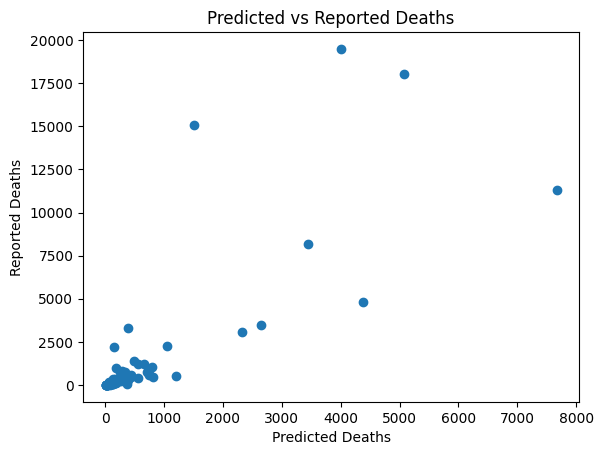

In [135]:
import matplotlib.pyplot as plt
plt.scatter(extreme['rf_pred_deaths'], extreme['total_deaths'])
plt.xlabel('Predicted Deaths')
plt.ylabel('Reported Deaths')
plt.title('Predicted vs Reported Deaths')
plt.show()


In [ ]:
print("Y_train stats (log):", y_train.describe())
print("Y_train stats (original):", np.expm1(y_train).describe())

Y_train stats (log): count   66.00
mean     5.26
std      2.09
min      0.69
25%      4.17
50%      5.19
75%      6.22
max      9.88
Name: total_deaths, dtype: float64
Y_train stats (original): count      66.00
mean     1523.98
std      3987.21
min         1.00
25%        64.00
50%       179.00
75%       502.00
max     19490.00
Name: total_deaths, dtype: float64


In [ ]:
print("Extreme total_deaths stats:", extreme['total_deaths'].describe())

Extreme total_deaths stats: count      83.00
mean     1339.72
std      3589.66
min         1.00
25%        53.00
50%       200.00
75%       649.00
max     19490.00
Name: total_deaths, dtype: float64
